# Import Essential Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as mplt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
import warnings 
warnings.filterwarnings('ignore')

In [3]:
adv = pd.read_csv('advertising.csv')

In [4]:
adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
adv.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
adv['Radio'].max()

49.6

In [9]:
adv['Radio'].min()

0.0

In [10]:
adv['TV'].max()

296.4

In [11]:
adv['TV'].min()

0.7

In [12]:
adv['Newspaper'].max()

114.0

In [13]:
adv['Newspaper'].min()

0.3

In [14]:
adv['Sales'].max()

27.0

In [15]:
adv['Sales'].min()

1.6

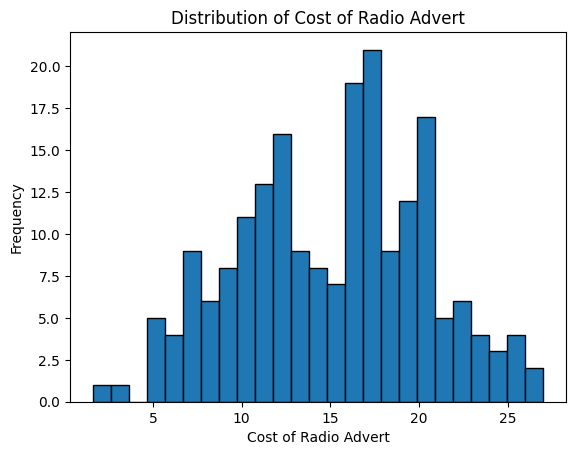

In [68]:
adv['Sales'].plot(kind='hist', bins=25, edgecolor= 'black')
mplt.xlabel('Cost of Radio Advert')
mplt.title('Distribution of Cost of Radio Advert')
#mplt.gca().set_facecolor('White')
mplt.show()

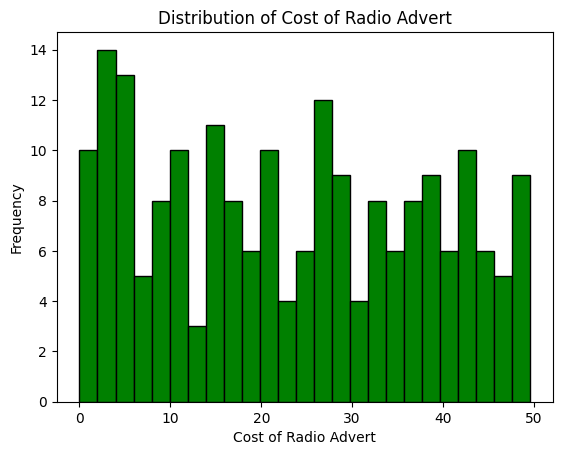

In [67]:
adv['Radio'].plot(kind='hist', bins=25, color='green', edgecolor= 'black')
mplt.xlabel('Cost of Radio Advert')
mplt.title('Distribution of Cost of Radio Advert')
mplt.show()

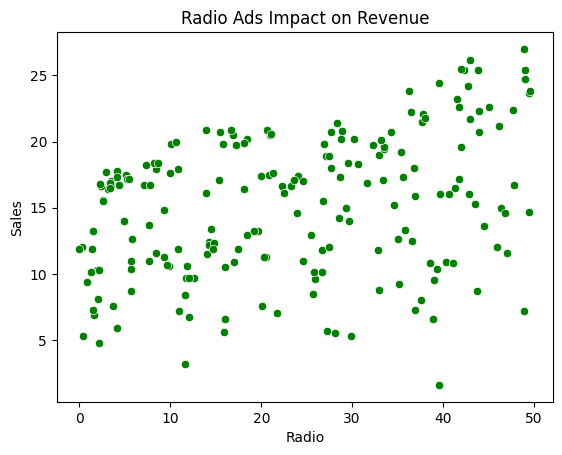

In [59]:
sn.scatterplot(data=adv, x='Radio', y='Sales', color= 'green')
mplt.title('Radio Ads Impact on Revenue')
mplt.show()

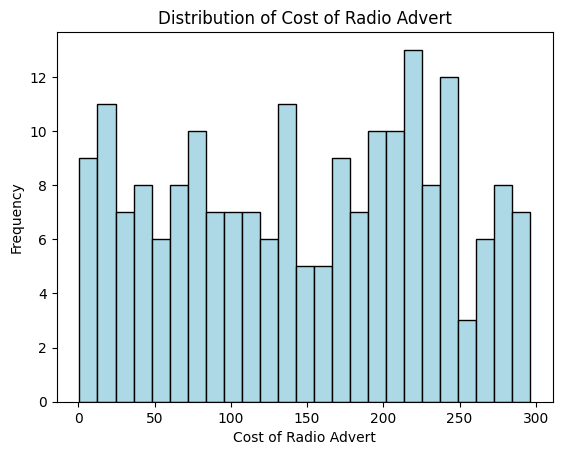

In [66]:
adv['TV'].plot(kind='hist', bins=25, color='lightblue', edgecolor='black')
mplt.xlabel('Cost of Radio Advert')
mplt.title('Distribution of Cost of Radio Advert')
mplt.show()

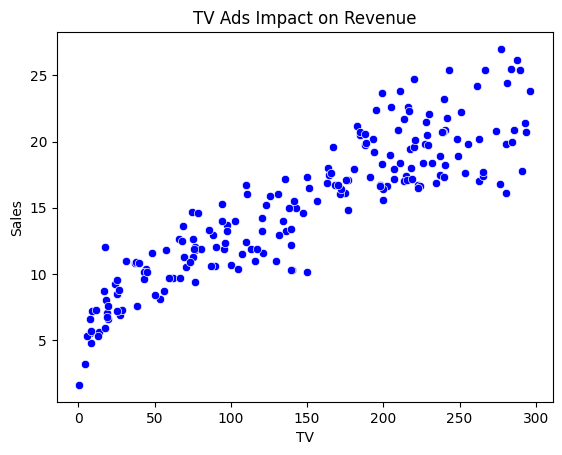

In [58]:
sn.scatterplot(data=adv, x='TV', y='Sales', color= 'blue')
mplt.title('TV Ads Impact on Revenue')
mplt.show()

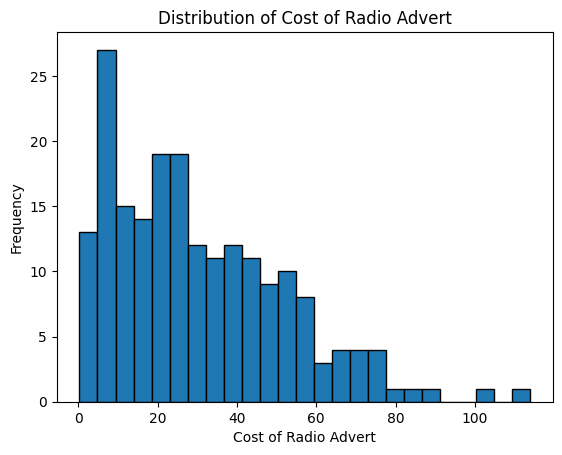

In [70]:
adv['Newspaper'].plot(kind='hist', bins=25, edgecolor='black')
mplt.xlabel('Cost of Radio Advert')
mplt.title('Distribution of Cost of Radio Advert')
mplt.show()

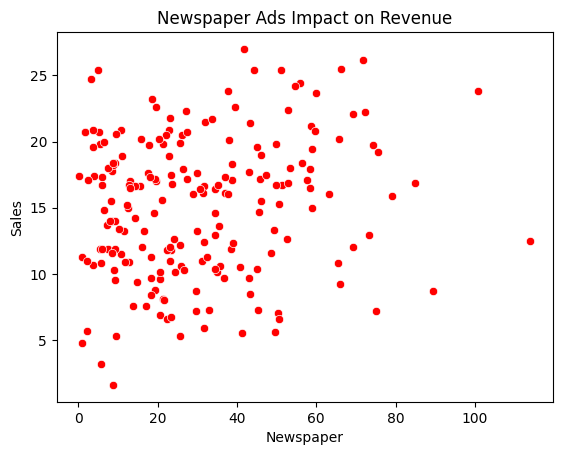

In [60]:
sn.scatterplot(data=adv, x='Newspaper', y='Sales', color='red')
mplt.title('Newspaper Ads Impact on Revenue')
mplt.show()

<Axes: >

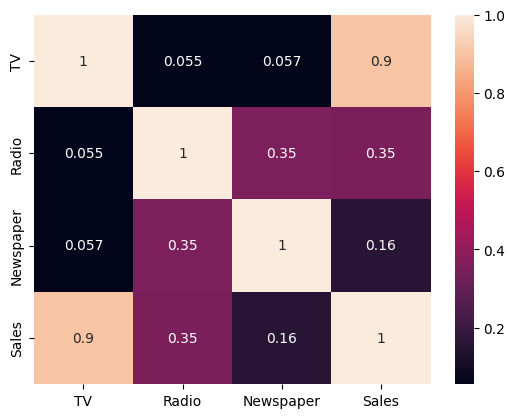

In [22]:
sn.heatmap(adv.corr(), annot= True)

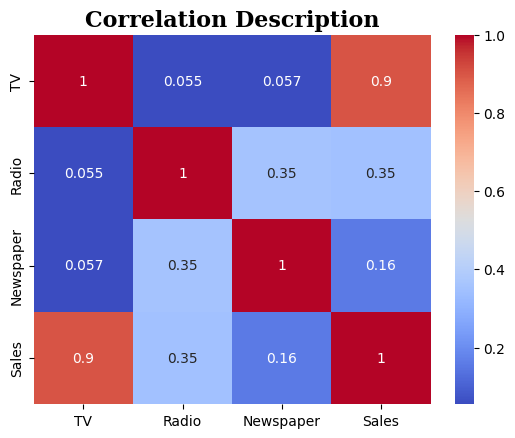

In [23]:
# Describe the correlation between variables
adv_corr = adv.corr()
sn.heatmap(adv_corr,  annot= True, cmap='coolwarm')
mplt.title('Correlation Description',
           fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'})
mplt.show()

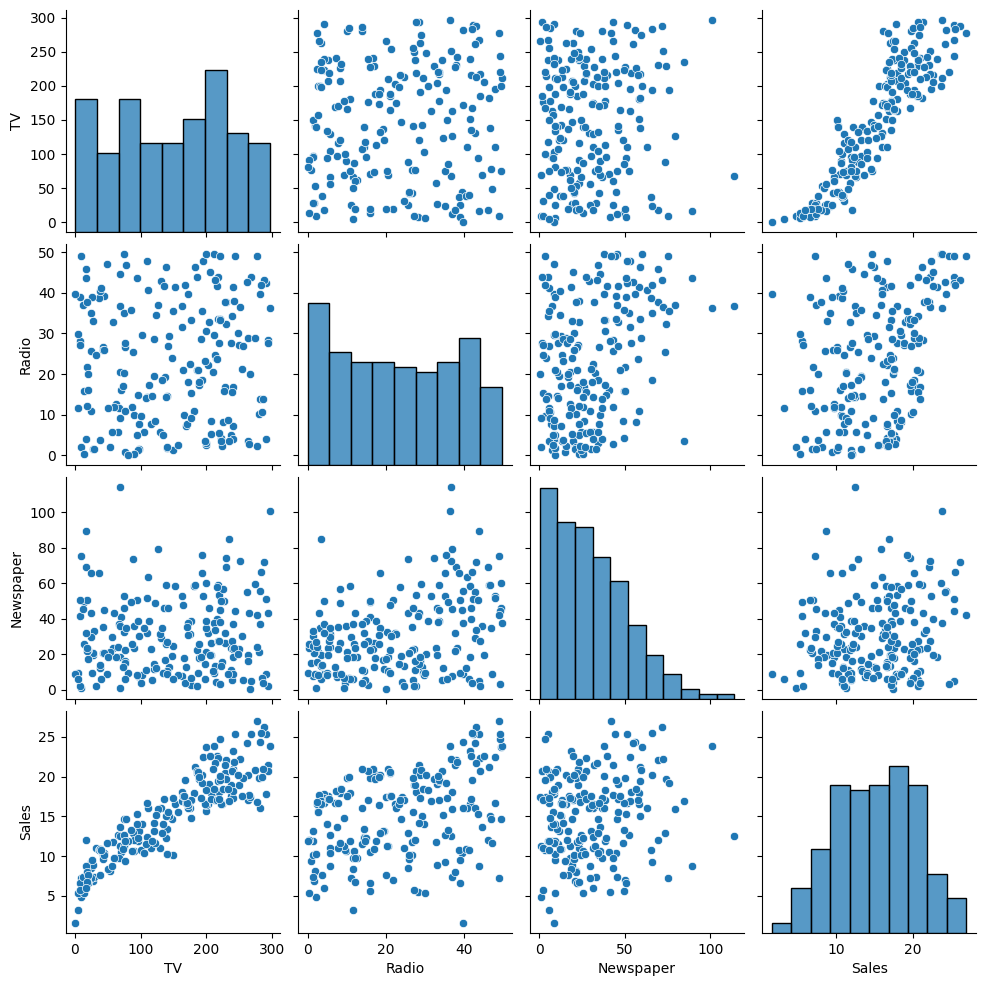

In [38]:
sn.pairplot(data=adv, kind='scatter', palette='red')

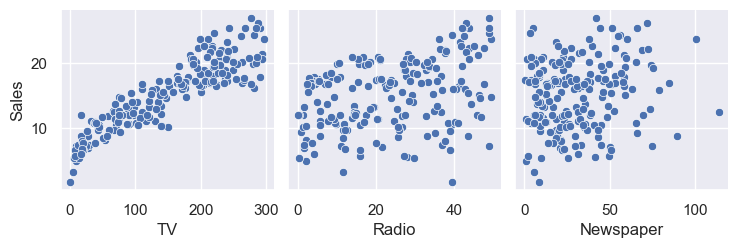

In [ ]:
sn.pairplot(kind='scatter', data=adv, y_vars= 'Sales', x_vars= ['TV', 'Radio', 'Newspaper'])
#mplt.figure(figsize=(10,10))
mplt.show()

In [74]:
X = adv.drop('Sales', axis=1)
y = adv['Sales']

In [75]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [76]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [77]:
X_scaled = scaler.fit_transform(X)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size= 0.8, random_state =  42)

In [89]:
X_train

array([[-3.62479475e-01, -1.05093669e+00, -3.43121138e-01],
       [ 3.49810063e-01, -9.42898996e-01, -1.11185242e+00],
       [-1.21372386e+00,  2.32010953e-01,  2.09260624e-01],
       [-9.89527805e-01, -7.20071247e-01, -5.64073843e-01],
       [ 8.98623313e-01, -1.40881156e+00, -6.88359740e-01],
       [-1.27094056e+00, -1.32103093e+00, -7.71217005e-01],
       [-8.92609721e-01, -4.90491142e-01,  4.71641962e-01],
       [ 3.00679600e-03,  4.29449843e-02, -5.27248393e-01],
       [-4.95595880e-01, -1.18598381e+00,  1.77038355e-01],
       [-8.26051518e-01,  2.86029801e-01, -6.69947015e-01],
       [-8.03865450e-01,  1.58923451e+00,  1.81641536e-01],
       [ 2.49388915e-01, -1.09145083e+00, -8.17248818e-01],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.62591764e+00,  1.05579839e+00,  9.22753735e-01],
       [-8.24883830e-01, -1.51684926e+00, -7.25185191e-01],
       [-2.06009314e-01, -1.18598381e+00,  3.43397329e-02],
       [-8.59914463e-01, -4.22967582e-01

In [82]:
y_train

4      17.9
32     13.2
142    20.1
145    10.3
109    19.8
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 100, dtype: float64

In [90]:
# Prints the shape of the train sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (160, 3)
y_train shape: (160,)
X_test shape: (40, 3)
y_test shape: (40,)


In [117]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [118]:
model.fit(X_train, y_train)

LinearRegression()

In [119]:
X_train_pred = model.predict(X_train)

In [120]:
X_test_pred = model.predict(X_test)

In [138]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [139]:
mae = mean_absolute_error(y_test, X_test_pred)*100
mse = mean_squared_error(y_test, X_test_pred)
rmae = mean_squared_error(y_test, X_test_pred, squared=False)
r2 = r2_score(y_test, X_test_pred)
print(mae)
print(mse)
print(rmae)
print(r2)


1.2748262109549349
2.907756910271094
1.7052146229349237
0.9059011844150825


ValueError: x and y must be the same size

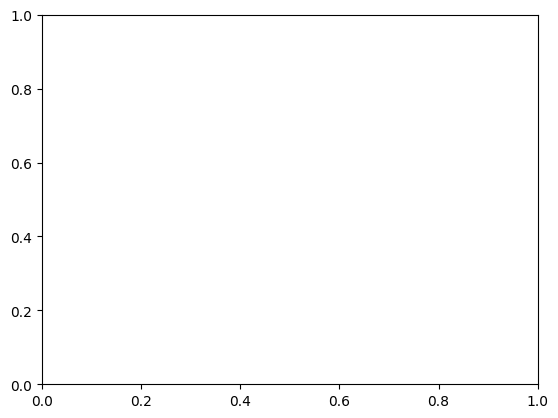

In [157]:
X_test_pred.plot(kind=)

In [143]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()


In [144]:
DTR.fit(X_train, y_train)

DecisionTreeRegressor()

In [145]:
DTR.predict(X_train)

array([11. , 14.8, 10.1,  9.7, 16.6,  7.6, 10.5, 14.6, 10.4, 12. , 14.6,
       16.7,  7.2,  6.6,  9.4, 11. , 10.9, 25.4,  7.6, 16.7, 20. , 20.5,
       11.9,  9.2, 17.8,  6.6, 20.7,  6.7, 14. ,  9.5, 10.7, 11.9, 19.9,
       17.1, 15.9, 20.9, 15. , 20.7, 16.7, 21.8, 12. , 14.2, 10.6, 17.3,
       11.9, 20.2, 13.3, 25.4, 10.8, 24.2,  5.6, 19.2, 23.8, 17.4, 17.4,
       17.3, 12.9, 11.8, 20.9, 15.5, 17.9, 13.2, 20.1, 10.3, 19.8, 12.3,
       12.6, 20.7, 17.1, 18.2,  8. , 22.1, 25.5, 16. , 18.3, 15.2, 16. ,
        8.5, 18. , 18.9, 16.6,  5.3,  3.2, 15.3, 17. , 20.5, 17.6, 25.4,
       17.3, 21.5, 17.1, 23.2, 11.5, 20.6, 17.9,  9.6, 16.5, 15. , 21.2,
       19.6, 15.5, 16.8, 22.6,  9.7, 11.8, 11.9, 13.2, 18.4,  7.3, 13.6,
       20.2, 17.2, 16.7,  4.8, 13.7, 18.4, 17.5, 17.7, 24.4,  8.8, 27. ,
       10.8, 17.2, 26.2, 14. , 20.2, 12. , 16.4, 14. , 23.8, 19.8, 12.9,
       17.5, 13.2, 16.4,  5.9,  9.7, 14.7, 10.1, 19.6, 10.4, 22.6, 10.1,
        1.6, 11.6, 19.7, 17.2, 12.2, 16. , 17. ,  7

In [148]:
dtr_X_test_pred = DTR.predict(X_test)
dtr_X_test_pred

array([17.5, 23.8, 19.8,  6.6, 23.8, 13.3, 22.6,  9.7, 16.7, 17.1,  4.8,
        9.7, 17.3,  6.6, 13.2, 17.6,  6.6, 17.3, 11.8, 20.7, 19.8, 13.3,
        9.5, 22.1,  9.7,  9.7, 22.6, 12.2, 10.6,  4.8, 16.4, 10.5, 23.8,
       12. , 20.1, 20.7, 14.6, 19.8, 12.2,  7.6])

In [149]:
mae = mean_absolute_error(y_test, dtr_X_test_pred)
mse = mean_squared_error(y_test, dtr_X_test_pred)
rmae = mean_squared_error(y_test, dtr_X_test_pred, squared=False)
r2 = r2_score(y_test, dtr_X_test_pred)
print(mae)
print(mse)
print(rmae)
print(r2)


1.2025000000000001
2.86875
1.6937384685954322
0.9071634990340149


In [112]:
from sklearn.ensemble import GradientBoostingRegressor
GBC = GradientBoostingRegressor()

In [113]:
GBC.fit(X_train, y_train)

GradientBoostingRegressor()

In [114]:
GBC.predict(X_train)

array([11.8397019 , 15.81485956,  9.6999543 ,  9.9366836 , 16.73130213,
        7.9602057 , 10.70464134, 14.03898263, 11.21763049, 12.5351852 ,
       14.67943516, 16.21400089,  7.51059688,  6.44732336,  9.76945403,
       11.38774662, 10.86674732, 25.60403108,  7.58023341, 16.8772595 ,
       19.96792464, 19.77884814, 11.99712107,  9.55645699, 17.75751681,
        7.1240955 , 20.52978702,  7.09564844, 13.3667596 ,  9.13324018,
       11.39260453, 11.68085506, 19.53107705, 17.43242313, 15.62755552,
       20.20018528, 15.31265654, 20.87866448, 16.93694322, 22.03712772,
       11.18974467, 14.19147451, 10.92855775, 18.50940703, 11.57101651,
       19.78223936, 13.87989017, 25.35537873, 11.06257367, 24.43273439,
        5.53648829, 19.357749  , 23.87816507, 17.69858871, 17.74864887,
       16.42501985, 12.7261237 , 11.25002932, 20.12976504, 14.94515001,
       17.92748727, 12.41677663, 19.48798231, 10.8626245 , 19.52421482,
       12.12387558, 11.17486421, 20.01266904, 16.98455725, 18.50

In [151]:
gbc_X_test_pred = GBC.predict(X_test)
gbc_X_test_pred

array([17.41885264, 23.21246384, 20.33085714,  6.19888096, 23.76475325,
       13.67283298, 22.42440391,  9.63988809, 16.7187096 , 16.08009996,
        7.93712139,  9.82573068, 17.78935507,  4.26829408, 10.95468295,
       15.77188711,  6.14018912, 17.63011564, 11.29922659, 19.73754635,
       20.05817414, 13.75630289,  9.79285407, 22.62150403, 10.94132614,
        9.22281093, 21.63585825, 13.34708164, 11.07009594,  5.81824453,
       16.75564427, 11.72090589, 23.00662389, 10.09683852, 20.10903675,
       20.41852803, 12.14058471, 19.69215013, 11.97102877,  7.51591072])

In [152]:
mae = mean_absolute_error(y_test, gbc_X_test_pred)
mse = mean_squared_error(y_test, gbc_X_test_pred)
rmae = mean_squared_error(y_test, dtr_X_test_pred, squared=False)
r2 = r2_score(y_test, gbc_X_test_pred)
print(mae)
print(mse)
print(rmae)
print(r2)

0.8234077578499178
1.2404818719380883
1.6937384685954322
0.9598563846614493
